# Tina Rezvanian



# Explaining numbers of unknown parameters:
 - From slide 51, we know that the number of parameters for the flatten layer is 576. this is because the previous conv2d_3 layer had a filter size of (3*3)and depth of 64. Therefore, the number of the parameters in the flatten layer is 3*3*64=576.

- When adding the dense layer dense_1, we specified that the number of nuerons would be 64.since dense layers are fully connected layers with one bias per neoron, in dense layer dense_1, we have a complete set of weights per neuron from each element of the flatten layer and one bias per nueron. That means we have: $576 \times 64 + 64 = 36928$ parameters for dense_1.


- When adding the dense layer dense_2, we specified that the number of nuerons would be 10. Similar to above, there is a compete set of parameters from each neouron in dense_1 per neouron in dense_2, and one bias per each neouron in dense_2. That means we have:  $64 \times 10 + 10 = 650$ parameters for dense_2.


# Using CNN's to classify MNIST Images

1) Comparison of MaxPooling layers versus AveragePooling2D layers

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
tf.keras.__version__
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


Model with MaxPooling2D layers names here as "model_maxpooling"


In [2]:
model_maxpooling = keras.models.Sequential()
model_maxpooling.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_maxpooling.add(keras.layers.MaxPooling2D((2, 2)))
model_maxpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_maxpooling.add(keras.layers.MaxPooling2D((2, 2)))
model_maxpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_maxpooling.add(keras.layers.Flatten())
model_maxpooling.add(keras.layers.Dense(64, activation='relu'))
model_maxpooling.add(keras.layers.Dense(10, activation='softmax'))

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [5]:
model_maxpooling.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_maxpooling.fit(train_images, 
                    train_labels, 
                    epochs=5, 
                    batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 335us/sample - loss: 0.1826 - accuracy: 0.9429
Epoch 2/5
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0480 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0318 - accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 21s 352us/sample - loss: 0.0250 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 27s 446us/sample - loss: 0.0201 - accuracy: 0.9940


In [6]:
test_loss, test_acc = model_maxpooling.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0416 - accuracy: 0.9877


Model with AveragePooling2D is called "model_avgpooling" model


In [7]:
model_avgpooling = keras.models.Sequential()
model_avgpooling.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_avgpooling.add(keras.layers.AveragePooling2D((2, 2)))
model_avgpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_avgpooling.add(keras.layers.AveragePooling2D((2, 2)))
model_avgpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_avgpooling.add(keras.layers.Flatten())
model_avgpooling.add(keras.layers.Dense(64, activation='relu'))
model_avgpooling.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model_avgpooling.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model_avgpooling.fit(train_images, 
                    train_labels, 
                    epochs=5, 
                    batch_size=64)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 390us/sample - loss: 0.2073 - accuracy: 0.9363
Epoch 2/5
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0574 - accuracy: 0.9825
Epoch 3/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.0390 - accuracy: 0.9877
Epoch 4/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0306 - accuracy: 0.9905
Epoch 5/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0252 - accuracy: 0.9921


In [9]:
test_loss, test_acc = model_avgpooling.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0295 - accuracy: 0.9907


# The test accuracy of Maxpooling2D is greater than the test accuracy of Avgpooling2D

# PLOTS:
To plot the accuracy vs. epoch diagrams, I split the train_images  into validation and training data as we did in the previous homework, and fitted the models to the splitted data to get the training and validation history of rdespective models:


In [73]:
x_val = train_images[:20000]
partial_x_train = train_images[20000:]

y_val = train_labels[:20000]
partial_y_train = train_labels[20000:]

In [75]:
model_maxpooling = keras.models.Sequential()
model_maxpooling.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_maxpooling.add(keras.layers.MaxPooling2D((2, 2)))
model_maxpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_maxpooling.add(keras.layers.MaxPooling2D((2, 2)))
model_maxpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_maxpooling.add(keras.layers.Flatten())
model_maxpooling.add(keras.layers.Dense(64, activation='relu'))
model_maxpooling.add(keras.layers.Dense(10, activation='softmax'))

model_maxpooling.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_maxpooling = model_maxpooling.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))

Train on 40000 samples, validate on 20000 samples
Epoch 1/5
40000/40000 [==============================] - 23s 574us/sample - loss: 0.2284 - accuracy: 0.9291 - val_loss: 0.1038 - val_accuracy: 0.9679
Epoch 2/5
40000/40000 [==============================] - 24s 606us/sample - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.0650 - val_accuracy: 0.9790
Epoch 3/5
40000/40000 [==============================] - 22s 561us/sample - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 4/5
40000/40000 [==============================] - 22s 555us/sample - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 5/5
40000/40000 [==============================] - 21s 535us/sample - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0555 - val_accuracy: 0.9839


In [76]:
model_avgpooling = keras.models.Sequential()
model_avgpooling.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_avgpooling.add(keras.layers.AveragePooling2D((2, 2)))
model_avgpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_avgpooling.add(keras.layers.AveragePooling2D((2, 2)))
model_avgpooling.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_avgpooling.add(keras.layers.Flatten())
model_avgpooling.add(keras.layers.Dense(64, activation='relu'))
model_avgpooling.add(keras.layers.Dense(10, activation='softmax'))

model_avgpooling.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_avgpooling = model_avgpooling.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))

Train on 40000 samples, validate on 20000 samples
Epoch 1/5
40000/40000 [==============================] - 24s 596us/sample - loss: 0.2710 - accuracy: 0.9161 - val_loss: 0.1003 - val_accuracy: 0.9715
Epoch 2/5
40000/40000 [==============================] - 23s 564us/sample - loss: 0.0756 - accuracy: 0.9771 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 3/5
40000/40000 [==============================] - 23s 578us/sample - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.0503 - val_accuracy: 0.9846
Epoch 4/5
40000/40000 [==============================] - 23s 573us/sample - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 5/5
40000/40000 [==============================] - 23s 570us/sample - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0565 - val_accuracy: 0.9842


## Plotting Validation and  training loss and accuracy for Maxpooling2D and Avgpooling2D for different epochs



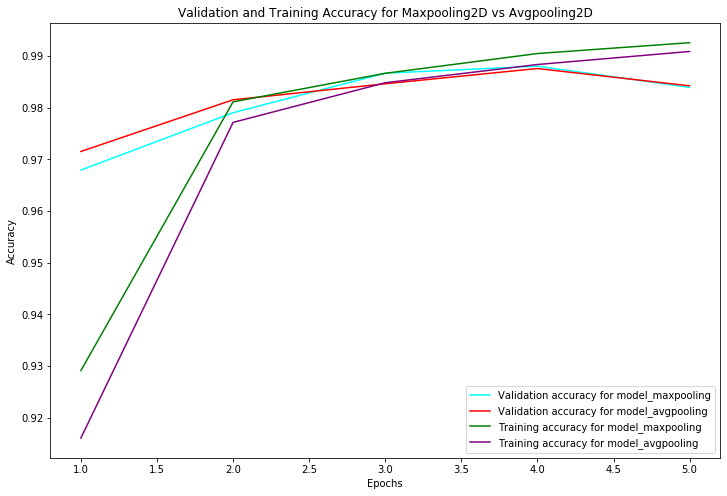

In [83]:
# ACCURACY
plt.figure(figsize=(12,8))
val_acc_maxpooling = history_maxpooling.history['val_accuracy']
train_acc_maxpooling = history_maxpooling.history['accuracy']
val_acc_avgpooling = history_avgpooling.history['val_accuracy']
train_acc_avgpooling = history_avgpooling.history['accuracy']

epochs = range(1,6)
plt.plot(epochs, val_acc_maxpooling, 'b', label='Validation accuracy for model_maxpooling', color = 'cyan')
plt.plot(epochs, val_acc_avgpooling, 'b', label='Validation accuracy for model_avgpooling', color = 'red')

plt.plot(epochs, train_acc_maxpooling, 'b', label='Training accuracy for model_maxpooling', color = 'green')
plt.plot(epochs, train_acc_avgpooling, 'b', label='Training accuracy for model_avgpooling', color = 'purple')
plt.title('Validation and Training Accuracy for Maxpooling2D vs Avgpooling2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


- the validation accuracy of Maxpooling2D is greater than Avgpooling2D
- the training accuracy of Maxpooling2D is greater than Avgpooling2D


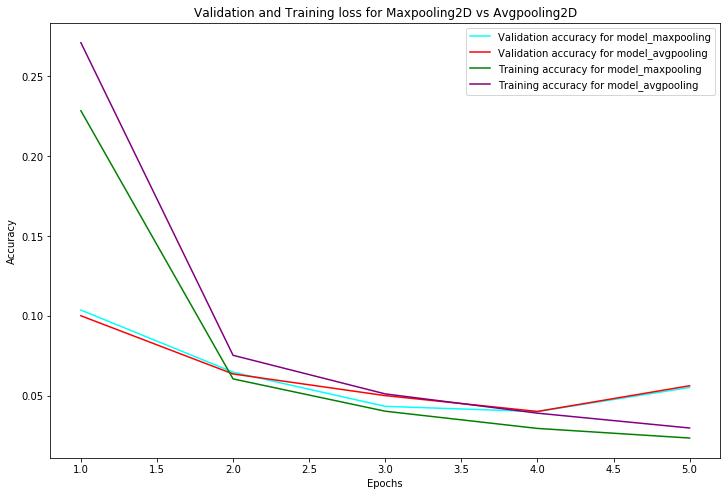

In [78]:
# LOSS
plt.figure(figsize=(12,8))
val_loss_maxpooling = history_maxpooling.history['val_loss']
train_loss_maxpooling = history_maxpooling.history['loss']
val_loss_avgpooling = history_avgpooling.history['val_loss']
train_loss_avgpooling = history_avgpooling.history['loss']

epochs = range(1,6)
plt.plot(epochs, val_loss_maxpooling, 'b', label='Validation accuracy for model_maxpooling', color = 'cyan')
plt.plot(epochs, val_loss_avgpooling, 'b', label='Validation accuracy for model_avgpooling', color = 'red')

plt.plot(epochs, train_loss_maxpooling, 'b', label='Training accuracy for model_maxpooling', color = 'green')
plt.plot(epochs, train_loss_avgpooling, 'b', label='Training accuracy for model_avgpooling', color = 'purple')
plt.title('Validation and Training loss for Maxpooling2D vs Avgpooling2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


- the validation Loss of Maxpooling2D is less than Avgpooling2D
- the training accuracy of Maxpooling2D is less than Avgpooling2D

==> Maxpooling2D model is a better model

# Changing the size of the filters on the first convolutional layer 


In [15]:
def Model_maxpooling_conv1(size_filter):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (size_filter, size_filter), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model


    

In [16]:
filter_sizes = [3,4,5,6]
history_list = []
test_loss_list = []
test_acc_list = []

for i in filter_sizes:
    model = Model_maxpooling_conv1(i)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))
    history_list.append(history)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)


Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 22s 377us/sample - loss: 0.1858 - accuracy: 0.9417 - val_loss: 0.0895 - val_accuracy: 0.9750
Epoch 2/5
59000/59000 [==============================] - 22s 381us/sample - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0831 - val_accuracy: 0.9790
Epoch 3/5
59000/59000 [==============================] - 23s 395us/sample - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 4/5
59000/59000 [==============================] - 25s 424us/sample - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0524 - val_accuracy: 0.9900
Epoch 5/5
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0286 - accuracy: 0.9915
Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 20s 339us/sample - loss: 0.1694 - accuracy: 0.9475 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 2/5
59000/59000 [=======================

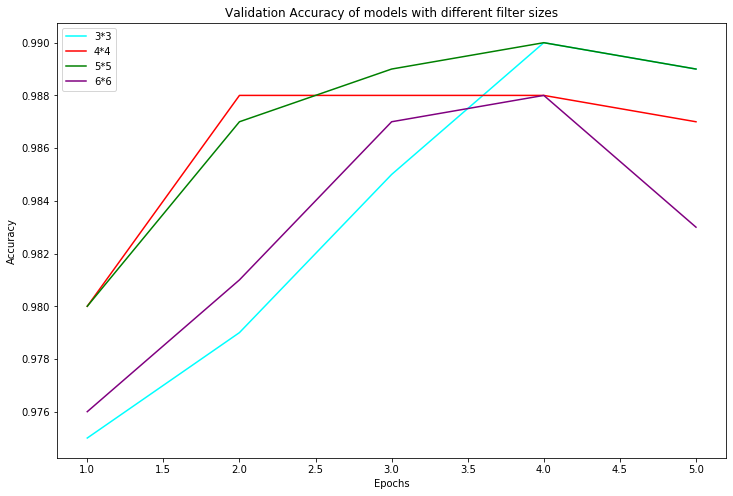

In [79]:
plt.figure(figsize=(12,8))
val_acc_maxpooling_size3 = history_list[0].history['val_accuracy']
val_acc_maxpooling_size4 = history_list[1].history['val_accuracy']
val_acc_maxpooling_size5 = history_list[2].history['val_accuracy']
val_acc_maxpooling_size6 = history_list[3].history['val_accuracy']


epochs = range(1,6)
plt.plot(epochs, val_acc_maxpooling_size3, 'b', label='3*3', color = 'cyan')
plt.plot(epochs, val_acc_maxpooling_size4, 'b', label='4*4', color = 'red')
plt.plot(epochs, val_acc_maxpooling_size5, 'b', label='5*5', color = 'green')
plt.plot(epochs, val_acc_maxpooling_size6, 'b', label='6*6', color = 'purple')
plt.title('Validation Accuracy of models with different filter sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

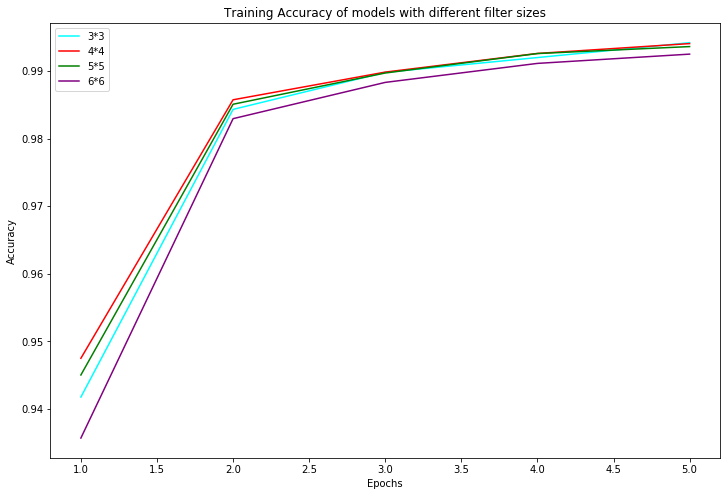

In [80]:
plt.figure(figsize=(12,8))
train_acc_maxpooling_size3 = history_list[0].history['accuracy']
train_acc_maxpooling_size4 = history_list[1].history['accuracy']
train_acc_maxpooling_size5 = history_list[2].history['accuracy']
train_acc_maxpooling_size6 = history_list[3].history['accuracy']

epochs = range(1,6)
plt.plot(epochs, train_acc_maxpooling_size3, 'b', label='3*3', color = 'cyan')
plt.plot(epochs, train_acc_maxpooling_size4, 'b', label='4*4', color = 'red')
plt.plot(epochs, train_acc_maxpooling_size5, 'b', label='5*5', color = 'green')
plt.plot(epochs, train_acc_maxpooling_size6, 'b', label='6*6', color = 'purple')
plt.title('Training Accuracy of models with different filter sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

** Problem 4.** Start with the model with the filter size 5x5 in the first convolutional layer.
Leave other convolutional layers with filter size (3,3). Add zero padding of thickness 3
rows and columns. Compare with the results of the model with no zero padding and filter
size 5x5. Also compare with the accuracy of the original model with filter size (3,3).
(20%)

In [20]:
# 

p4_model = keras.models.Sequential()
p4_model.add(keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(28, 28, 1)))
#Start with the model with the filter size 5x5 in the first convolutional layer.
p4_model.add(keras.layers.Conv2D(32, (5, 5), activation='relu'))
p4_model.add(keras.layers.MaxPooling2D((2, 2)))
#Leave other convolutional layers with filter size (3,3)
p4_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
p4_model.add(keras.layers.MaxPooling2D((2, 2)))
#Leave other convolutional layers with filter size (3,3)
p4_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
p4_model.add(keras.layers.Flatten())
p4_model.add(keras.layers.Dense(64, activation='relu'))
p4_model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
p4_model.summary ()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)             

In [22]:
p4_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_p4 = p4_model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 35s 589us/sample - loss: 0.1470 - accuracy: 0.9536 - val_loss: 0.0946 - val_accuracy: 0.9790
Epoch 2/5
59000/59000 [==============================] - 36s 609us/sample - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0655 - val_accuracy: 0.9850
Epoch 3/5
59000/59000 [==============================] - 35s 593us/sample - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0503 - val_accuracy: 0.9900
Epoch 4/5
59000/59000 [==============================] - 37s 620us/sample - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0472 - val_accuracy: 0.9900
Epoch 5/5
59000/59000 [==============================] - 35s 597us/sample - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0479 - val_accuracy: 0.9900


In [23]:
# second model: model_no_padding
model_no_padding = keras.models.Sequential()
# model with the filter size 5x5 in the first convolutional layer.
model_no_padding.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_no_padding.add(keras.layers.MaxPooling2D((2, 2)))
#  other convolutional layers with filter size (3,3)
model_no_padding.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_no_padding.add(keras.layers.MaxPooling2D((2, 2)))
model_no_padding.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_no_padding.add(keras.layers.Flatten())
model_no_padding.add(keras.layers.Dense(64, activation='relu'))
model_no_padding.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model_no_padding.summary ()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [25]:
model_no_padding.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_no_padding = model_no_padding.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 22s 367us/sample - loss: 0.1693 - accuracy: 0.9471 - val_loss: 0.0684 - val_accuracy: 0.9850
Epoch 2/5
59000/59000 [==============================] - 23s 383us/sample - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0602 - val_accuracy: 0.9850
Epoch 3/5
59000/59000 [==============================] - 21s 361us/sample - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 4/5
59000/59000 [==============================] - 22s 367us/sample - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0440 - val_accuracy: 0.9860
Epoch 5/5
59000/59000 [==============================] - 22s 380us/sample - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0534 - val_accuracy: 0.9890


In [26]:
# third model: no padding filter (3*3)
org_model_filter3 = keras.models.Sequential()
# model with the filter size 5x5 in the first convolutional layer.
org_model_filter3.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
org_model_filter3.add(keras.layers.MaxPooling2D((2, 2)))
# other convolutional layers with filter size (3,3)
org_model_filter3.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
org_model_filter3.add(keras.layers.MaxPooling2D((2, 2)))
org_model_filter3.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
org_model_filter3.add(keras.layers.Flatten())
org_model_filter3.add(keras.layers.Dense(64, activation='relu'))
org_model_filter3.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
org_model_filter3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_org_model_filter3 = org_model_filter3.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 24s 415us/sample - loss: 0.1630 - accuracy: 0.9488 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 2/5
59000/59000 [==============================] - 23s 398us/sample - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0765 - val_accuracy: 0.9830
Epoch 3/5
59000/59000 [==============================] - 25s 416us/sample - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0622 - val_accuracy: 0.9870
Epoch 4/5
59000/59000 [==============================] - 24s 414us/sample - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0636 - val_accuracy: 0.9880
Epoch 5/5
59000/59000 [==============================] - 25s 420us/sample - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0488 - val_accuracy: 0.9870


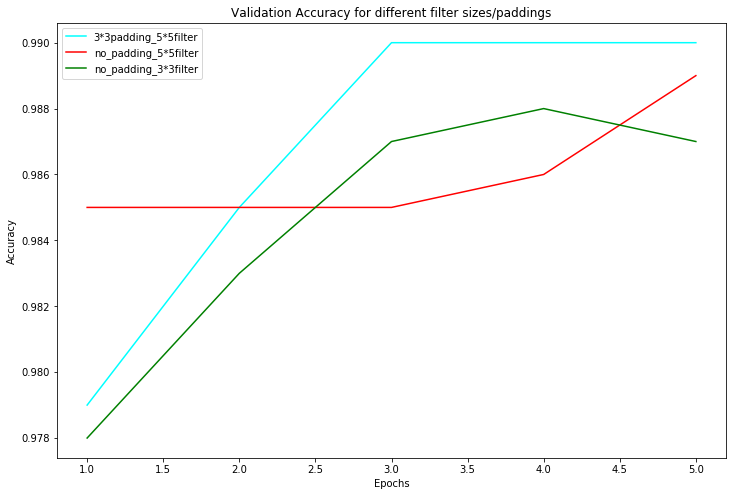

In [81]:
plt.figure(figsize=(12,8))

al_acc_p4_model = history_p4.history['val_accuracy']
val_acc_no_padding = history_no_padding.history['val_accuracy']
val_acc_org_model_filter3 = history_org_model_filter3.history['val_accuracy']

epochs = range(1,6)
plt.plot(epochs, val_acc_p4_model, 'b', label='3*3padding_5*5filter', color = 'cyan')
plt.plot(epochs, val_acc_no_padding, 'b', label='no_padding_5*5filter', color = 'red')
plt.plot(epochs, val_acc_org_model_filter3, 'b', label='no_padding_3*3filter', color = 'green')
plt.title('Validation Accuracy for different filter sizes/paddings')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

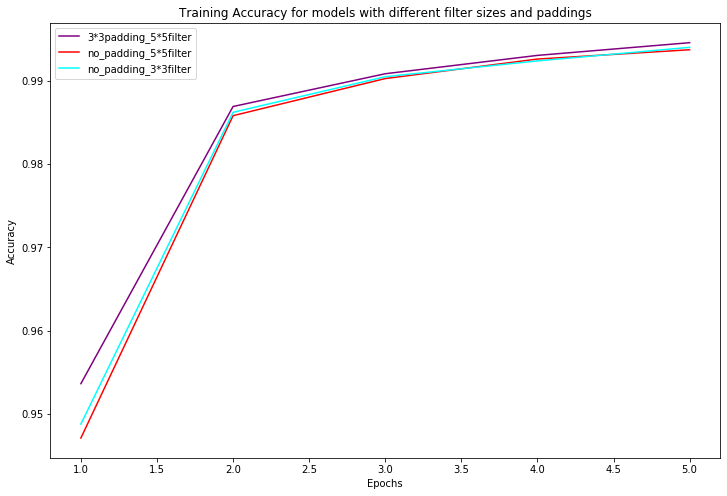

In [82]:
plt.figure(figsize=(12,8))
train_acc_p4_model = history_p4.history['accuracy']
train_acc_no_padding = history_no_padding.history['accuracy']
train_acc_org_model_filter3 = history_org_model_filter3.history['accuracy']

epochs = range(1,6)
plt.plot(epochs, train_acc_p4_model, 'b', label='3*3padding_5*5filter', color = 'purple')
plt.plot(epochs, train_acc_no_padding, 'b', label='no_padding_5*5filter', color = 'red')
plt.plot(epochs, train_acc_org_model_filter3, 'b', label='no_padding_3*3filter', color = 'cyan')

plt.title('Training Accuracy for models with different filter sizes and paddings')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# implementing an edge detector using the discrete Laplacian operator as


In [33]:
# ! pip install Pillow

In [34]:
from PIL import Image
import scipy.ndimage
from matplotlib import pyplot as plt
%matplotlib inline

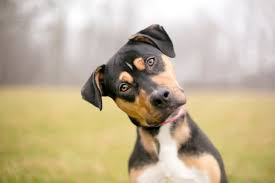

In [53]:
dog = Image.open("download2.jpeg")
dog

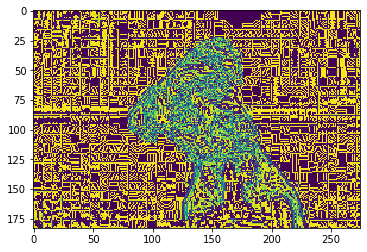

In [85]:
image_input = np.asmatrix(dog.convert('L'))
kernel = np.asmatrix([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
filtered_output = scipy.ndimage.correlate(image_input, kernel, mode='nearest')
plt.imshow(filtered_output)
plt.show()